In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df_train = pd.read_csv(r"C:\Users\Prajwal\Desktop\Mtech\Second Sem\ML\train.csv")
df_test = pd.read_csv(r"C:\Users\Prajwal\Desktop\Mtech\Second Sem\ML\test.csv")

In [ ]:
df_train.head()

In [ ]:
df_train.describe()

In [ ]:
# Preprocessing
# Fill missing values
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)

In [ ]:
# Feature selection
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = pd.get_dummies(df_train[features])
print("Input matrix for the training data, X:\n", X)

In [ ]:
y = df_train['Survived']
print("Target Variable, y:\n", y)

In [ ]:
X_test = pd.get_dummies(df_test[features])
print("Input matrix for the test data, X_test:\n", X_test)

In [ ]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:\n", X_train)
print("X_val:\n", X_val)
print("y_train:\n", y_train)
print("y_val:\n", y_val)

In [25]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 5, 7]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           n_jobs=-1,
                           verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Hyperparameters: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [41]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=5, random_state=42)
dt_classifier.fit(X_train, y_train)

# Model evaluation
# Cross-validation
cv_scores = cross_val_score(dt_classifier, X, y, cv=11)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean()}")

# Predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Output predictions to a file
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred})
output.to_csv(r"C:\Users\Prajwal\Desktop\Mtech\Second Sem\ML\titanic_predictions_dt_classification.csv", index=False)

Cross-validation scores: [0.82716049 0.81481481 0.82716049 0.80246914 0.86419753 0.83950617
 0.77777778 0.80246914 0.7654321  0.88888889 0.81481481]
Mean CV accuracy: 0.8204264870931538


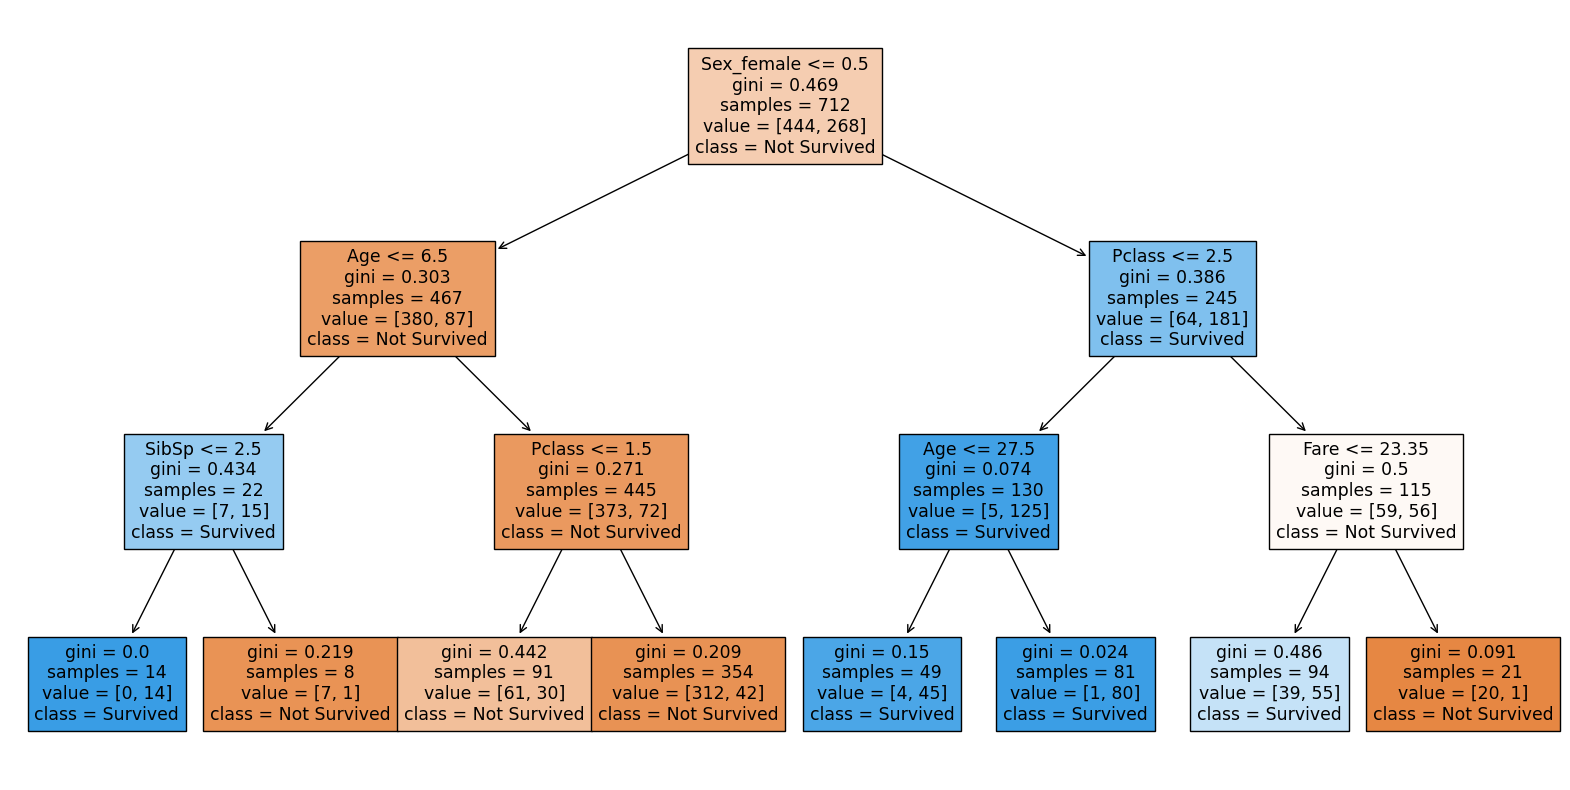

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt

# Get feature names as a list
feature_names = X.columns.tolist()

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, filled=True, feature_names=feature_names, class_names=['Not Survived', 'Survived'])
plt.show()


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Define the pipeline with an imputer and the random forest classifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Use mean to impute missing values
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the hyperparameters to tune
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [2, 5, 7, 10],
    'classifier__min_samples_leaf': [1, 2, 4, 5, 7]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           n_jobs=-1,
                           verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Output predictions to a file
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred})
output.to_csv(r"C:\Users\Prajwal\Desktop\Mtech\Second Sem\ML\titanic_predictions_rf_classification.csv", index=False)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Hyperparameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 7, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=7, random_state=42)
rf_classifier.fit(X_train, y_train)

# Model evaluation

# Random Forest
rf_cv_scores = cross_val_score(rf_classifier, X, y, cv=11)
print(f"Cross-validation scores: {rf_cv_scores}")
print(f"Random Forest - Mean CV accuracy: {rf_cv_scores.mean()}")

Cross-validation scores: [0.80246914 0.81481481 0.80246914 0.82716049 0.90123457 0.85185185
 0.81481481 0.81481481 0.7654321  0.86419753 0.83950617]
Random Forest - Mean CV accuracy: 0.8271604938271605


In [51]:
# # Decision Tree
print(f"Decision Tree - Mean CV accuracy: {cv_scores.mean()}")
# Random Forest
print(f"Random Forest - Mean CV accuracy: {rf_cv_scores.mean()}")

# Compare the results
print(f"Decision Tree vs Random Forest: {np.mean(rf_cv_scores) - np.mean(cv_scores)}")

Decision Tree - Mean CV accuracy: 0.8204264870931538
Random Forest - Mean CV accuracy: 0.8271604938271605
Decision Tree vs Random Forest: 0.006734006734006703


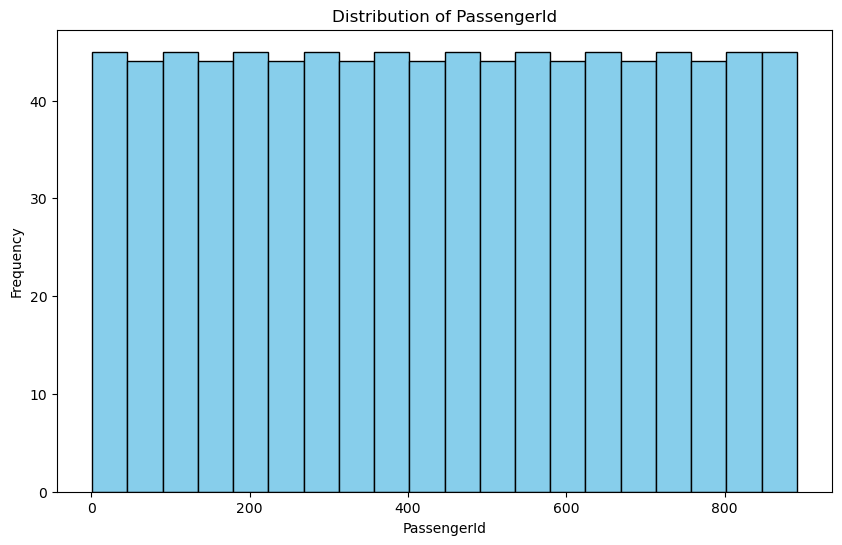

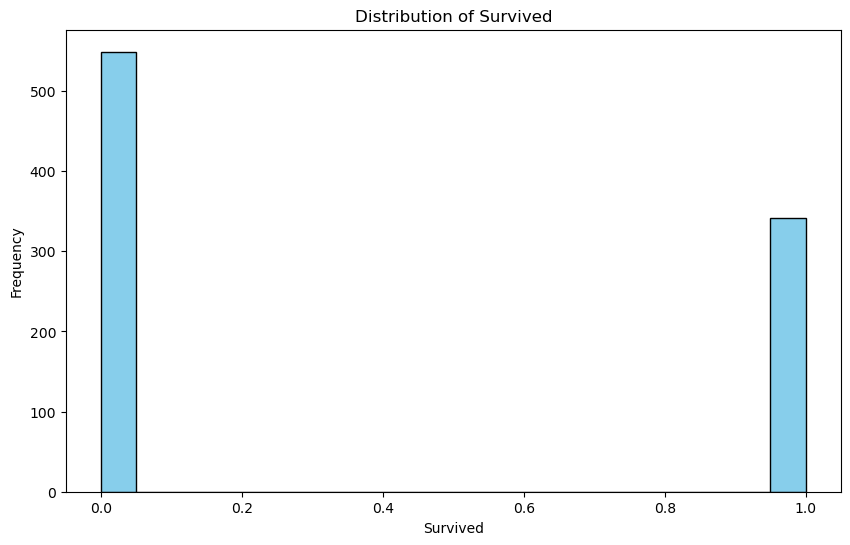

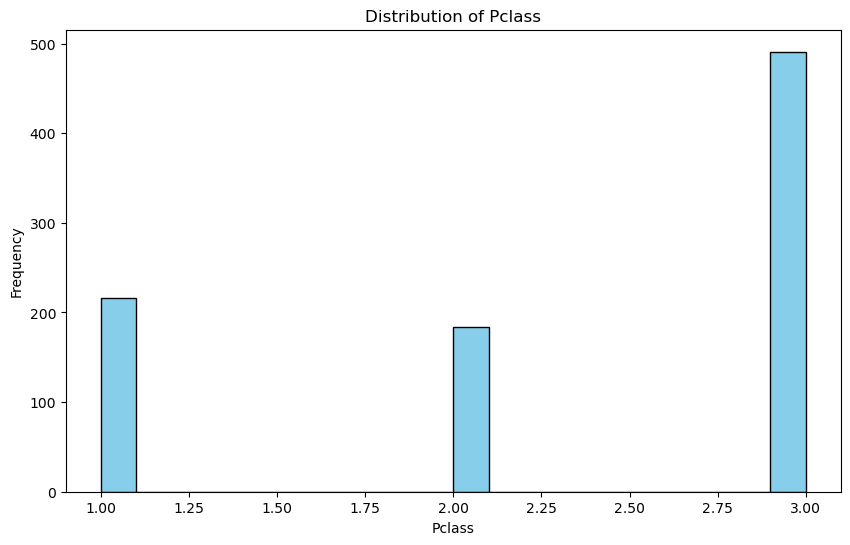

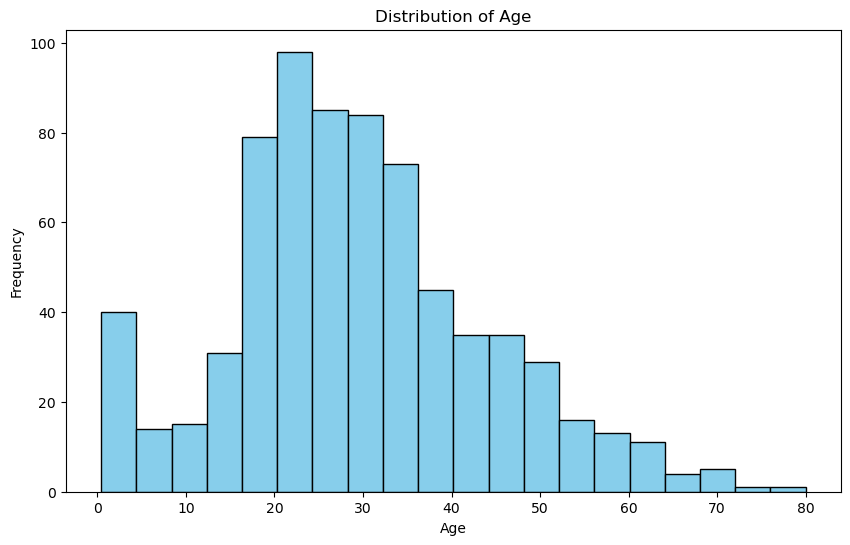

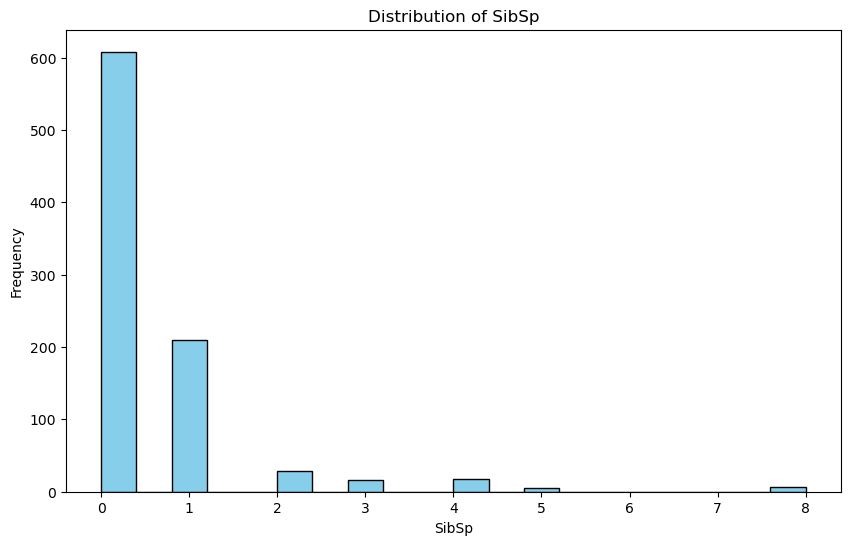

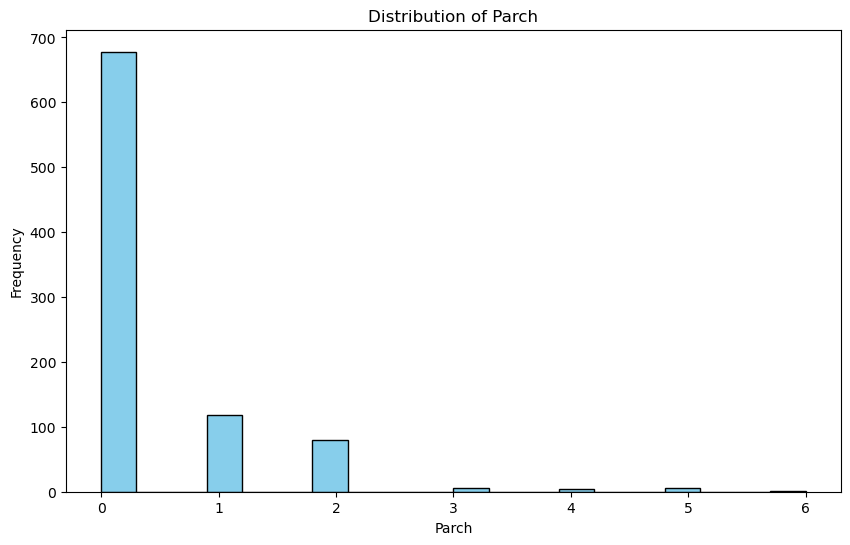

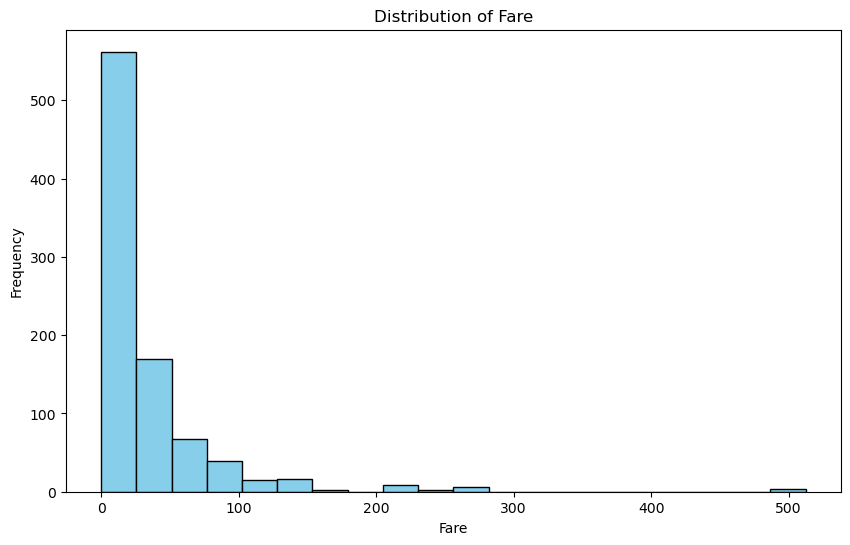

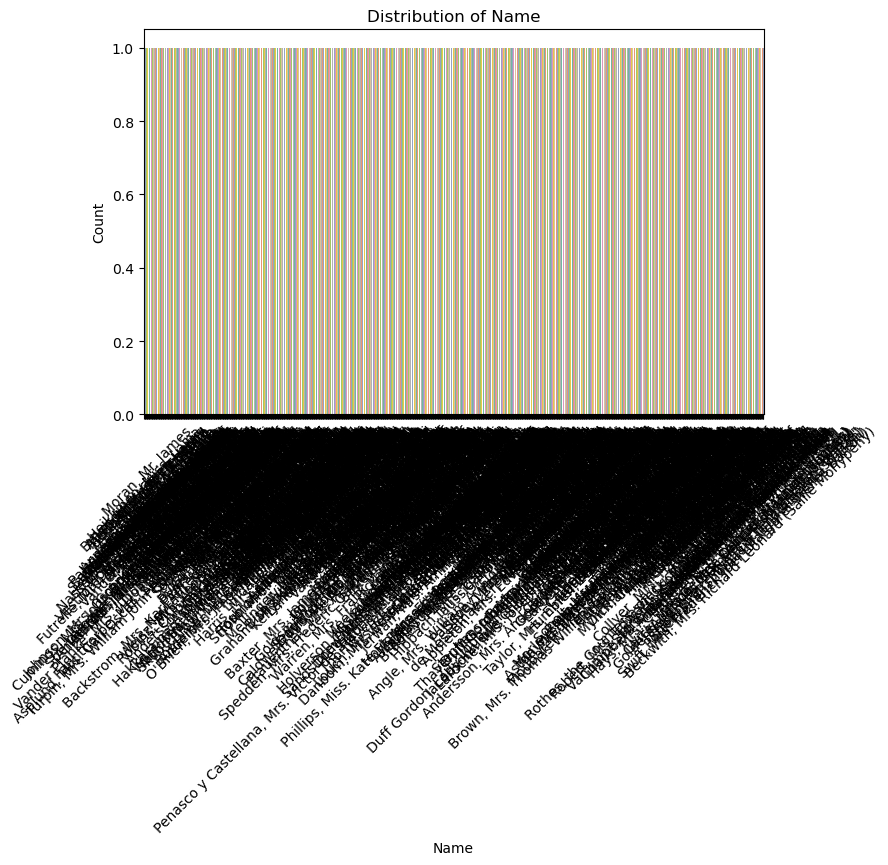

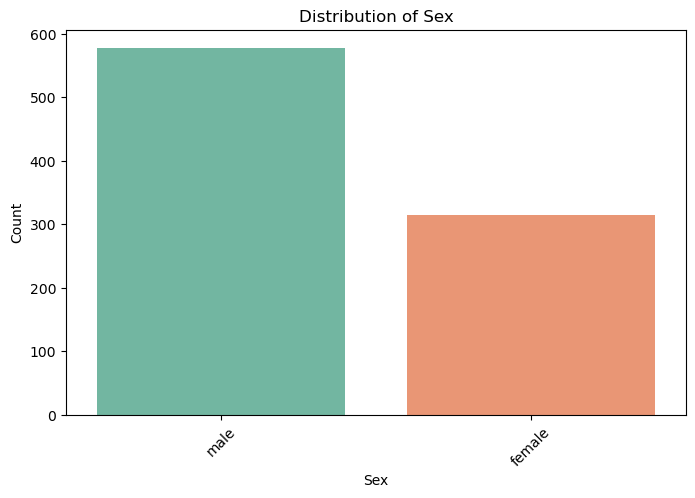

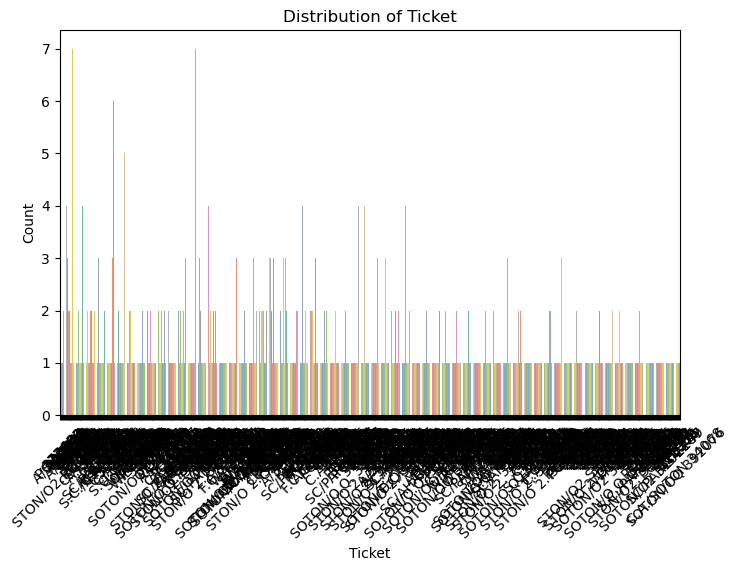

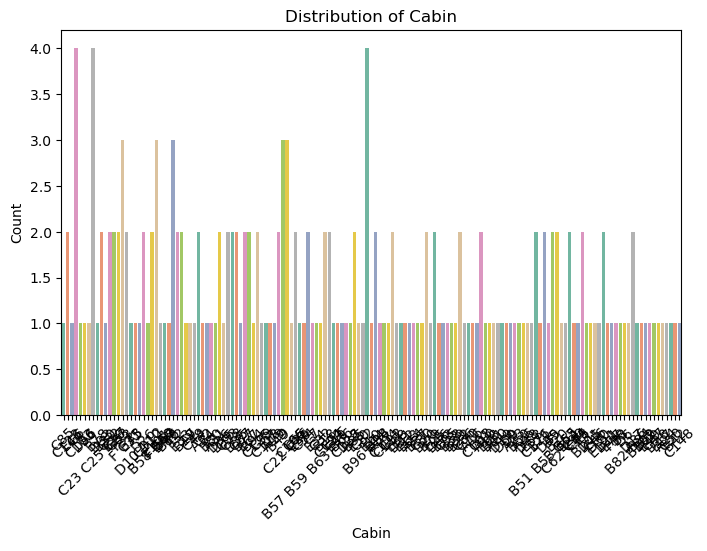

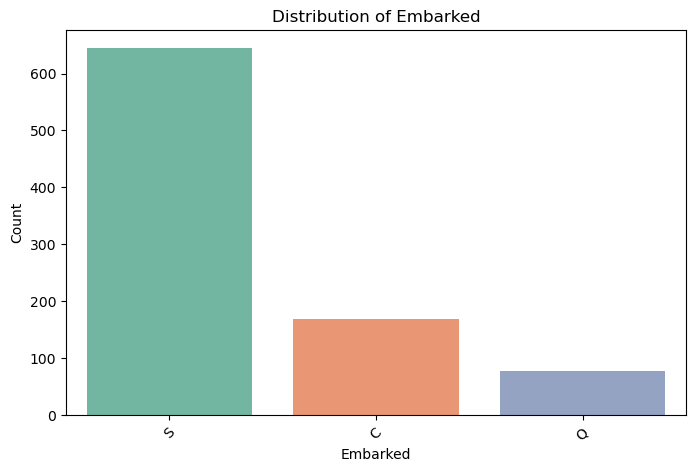

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the Titanic dataset
train_data = pd.read_csv(r"C:\Users\Prajwal\Desktop\Mtech\Second Sem\ML\train.csv")

# Plot histograms for numerical columns
numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(train_data[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

# Plot bar plots for categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train_data, x=col, palette='Set2')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()
